In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
# pylance: reportMissingImports=false
import mpl_toolkits.mplot3d
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# sensor data
X_train = pd.read_csv('/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/X_train.txt', sep='\s+', header=None)
X_test = pd.read_csv('/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/X_test.txt', sep='\s+', header=None)

# sensor labels
sensor_labels = pd.read_csv('/human+activity+recognition+using+smartphones/UCI HAR Dataset/features.txt', sep=' ', header=None, names=(['ID','Sensor']))

# activity class
y_train = pd.read_csv('/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=('Y',))
y_test = pd.read_csv('/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=('Y',))

# activity labels
activity_labels = pd.read_csv('human+activity+recognition+using+smartphones/UCI HAR Dataset/activity_labels.txt', sep=' ', header=None, names=(['ID','Activity']))

In [3]:
activity_labels.head(6)

,ID,Activity
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


In [4]:
activity_labels.describe()

,ID
count,6.000000
mean,3.500000
std,1.870829
min,1.000000
25%,2.250000
50%,3.500000
75%,4.750000
max,6.000000


In [5]:
y_train['Y'].value_counts()

Y
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

In [6]:
y_test['Y'].value_counts()

Y
6    537
5    532
1    496
4    491
2    471
3    420
Name: count, dtype: int64

In [7]:
print(y_train.shape)
print(y_test.shape)

(7352, 1)
(2947, 1)


In [8]:
sensor_labels.head()

,ID,Sensor
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [9]:
X_train.columns = sensor_labels['Sensor']
X_test.columns = sensor_labels['Sensor']

In [10]:
X_train.head()

Sensor,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [11]:
print(X_train.shape)
print(X_test.shape)

(7352, 561)
(2947, 561)


In [12]:
X_train.describe()

Sensor,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


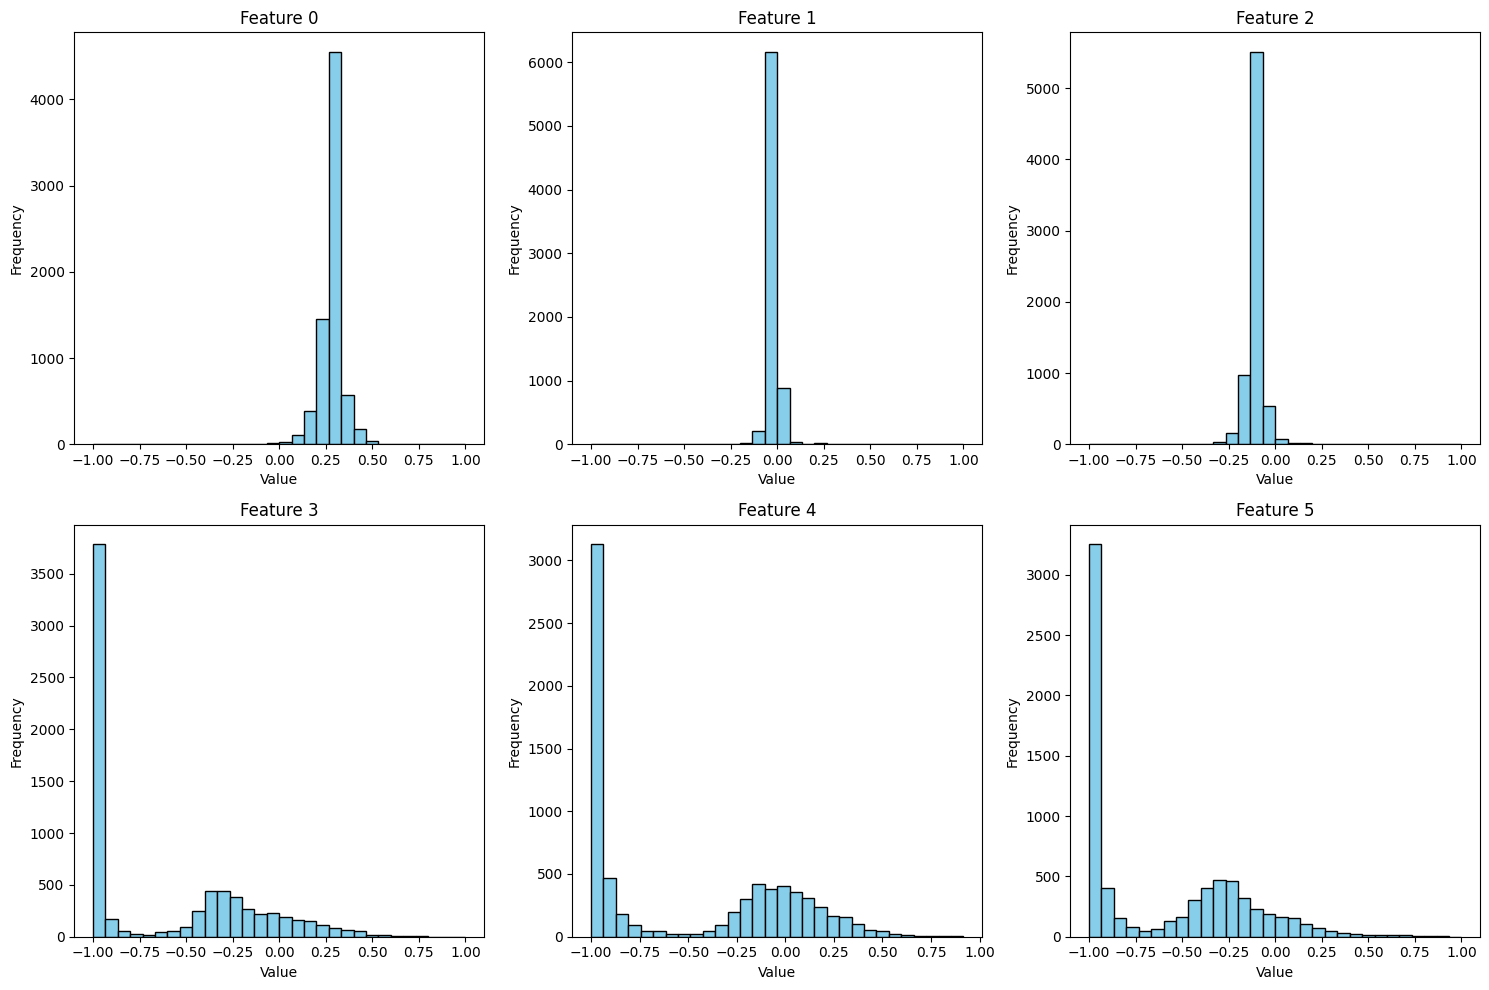

In [13]:
import matplotlib.pyplot as plt

# Function to create histograms for a subset of features
def create_histograms(data, feature_indices, bins=30):
    num_features = len(feature_indices)
    num_cols = 3  # Number of columns in the subplot grid
    num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

    plt.figure(figsize=(15, 5*num_rows))

    for i, idx in enumerate(feature_indices):
        plt.subplot(num_rows, num_cols, i+1)
        plt.hist(data.iloc[:, idx], bins=bins, color='skyblue', edgecolor='black')
        plt.title(f'Feature {idx}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Define indices of features to include in histograms (can be adjusted as needed)
feature_indices = [0, 1, 2, 3, 4, 5]

# Create histograms for the selected features
create_histograms(X_train, feature_indices)


In [14]:
# Preprocessing 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [15]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train_scaled)

In [16]:
from scipy import stats
from sklearn.preprocessing import StandardScaler


# Function to detect outliers using z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    outlier_indices = np.where(z_scores > threshold)
    return outlier_indices

# Define the threshold for z-score
threshold = 10

# Detect outliers in the dataset
outlier_indices = detect_outliers_zscore(X_train_normalized, threshold)

# Print the indices of outliers
print("Indices of outliers:")
print(outlier_indices)

# Print the number of outliers detecteda
print(f"Number of outliers detected: {len(outlier_indices[0])}")



Indices of outliers:
(array([  67,   69,   71,   71,   71,   71,   71,   72,   72,   72,  134,
        134,  140,  237,  237,  237,  237,  271,  500,  500,  632,  827,
        934, 1062, 1062, 1062, 1110, 1209, 1209, 1209, 1209, 1257, 1257,
       1257, 1267, 1267, 1267, 1267, 1267, 1267, 1269, 1270, 1270, 1270,
       1270, 1270, 1270, 1270, 1271, 1271, 1271, 1271, 1271, 1271, 1272,
       1272, 1272, 1272, 1274, 1274, 1278, 1279, 1279, 1283, 1283, 1283,
       1284, 1286, 1286, 1288, 1289, 1308, 1308, 1311, 1355, 1355, 1355,
       1369, 1369, 1369, 1423, 1423, 1513, 1513, 1513, 1523, 1523, 1523,
       1597, 1645, 1645, 1645, 1724, 1724, 1724, 1724, 1724, 1725, 1725,
       1731, 1745, 1745, 1773, 1773, 1773, 1795, 1813, 1813, 1813, 1826,
       1826, 1826, 1826, 1847, 1848, 1855, 1860, 1862, 1862, 1862, 1866,
       1868, 1868, 1868, 1868, 1887, 1887, 1887, 1893, 1895, 1895, 1897,
       1897, 1897, 1898, 1898, 1898, 1898, 1903, 1903, 1903, 1925, 1970,
       2276, 2276, 2276, 2337

In [17]:
from scipy import stats

# Function to remove outliers using z-score
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    outlier_indices = np.where(z_scores > threshold)
    cleaned_data = np.delete(data, outlier_indices[0], axis=0)
    return cleaned_data

# Define the threshold for z-score
threshold = 3

# Remove outliers from the normalized dataset
X_train_cleaned = remove_outliers_zscore(X_train_normalized, threshold)

# Print the shape of the original and cleaned datasets
print("Shape of original dataset:", X_train_normalized.shape)
print("Shape of cleaned dataset:", X_train_cleaned.shape)


Shape of original dataset: (7352, 561)
Shape of cleaned dataset: (2799, 561)


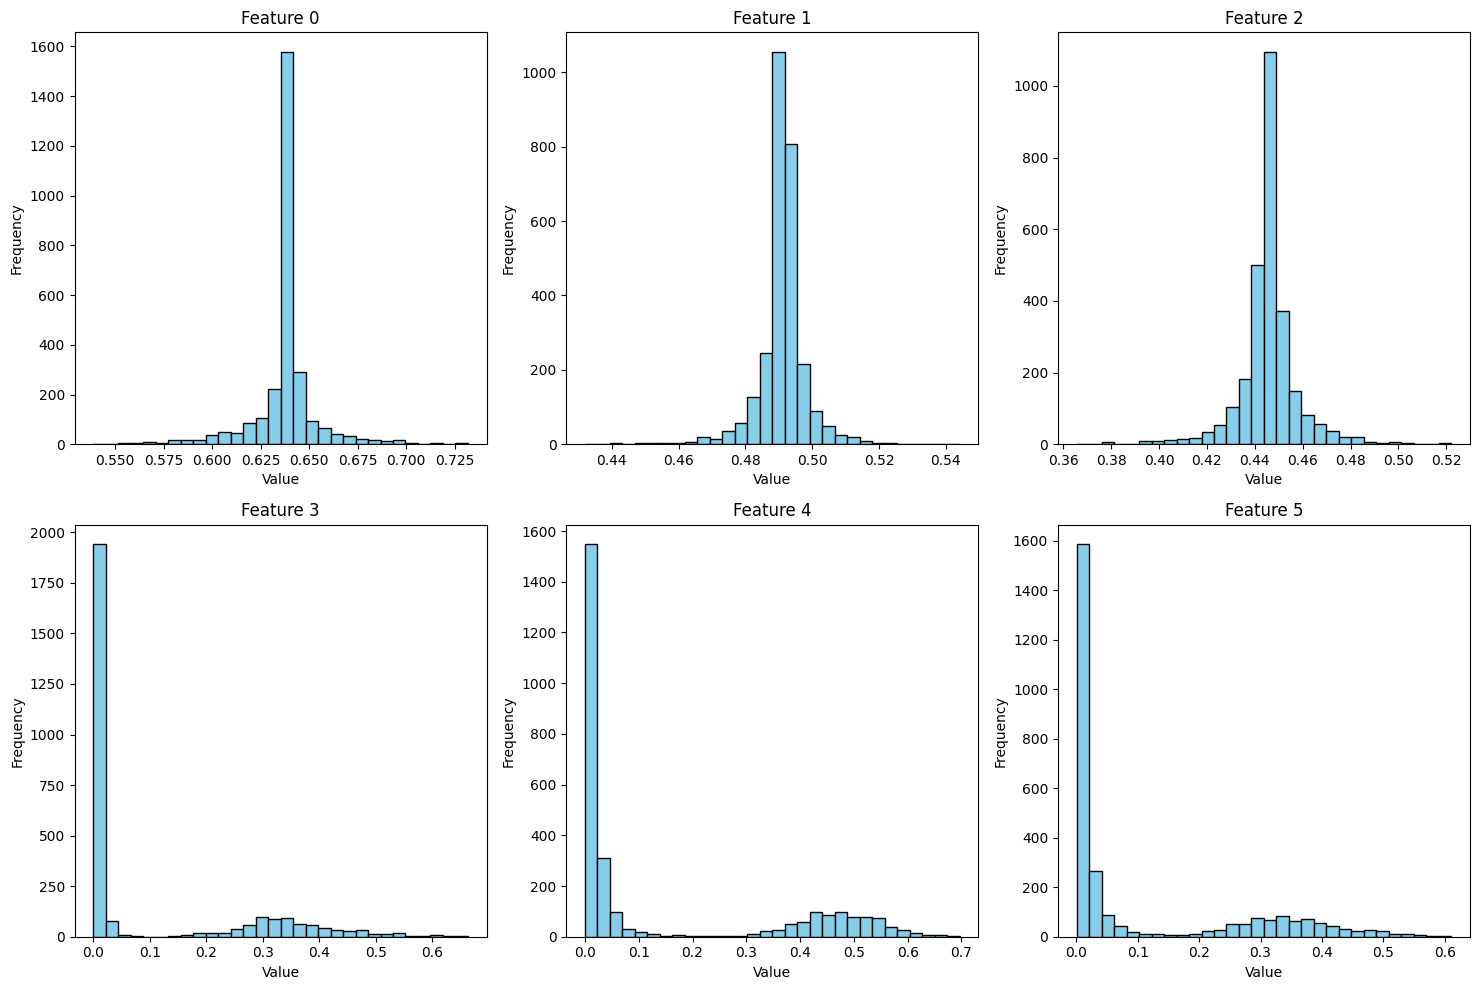

In [18]:
import matplotlib.pyplot as plt

# Function to create histograms for a subset of features
def create_histograms(data, feature_indices, bins=30):
    num_features = len(feature_indices)
    num_cols = 3  # Number of columns in the subplot grid
    num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

    plt.figure(figsize=(15, 5*num_rows))

    for i, idx in enumerate(feature_indices):
        plt.subplot(num_rows, num_cols, i+1)
        plt.hist(data[:, idx], bins=bins, color='skyblue', edgecolor='black')
        plt.title(f'Feature {idx}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Define indices of features to include in histograms (can be adjusted as needed)
feature_indices = [0, 1, 2, 3, 4, 5]

# Create histograms for the selected features in the cleaned dataset
create_histograms(X_train_cleaned, feature_indices)


In [19]:
# look at the data through a correlation matrix
correlations = X_train.corr()

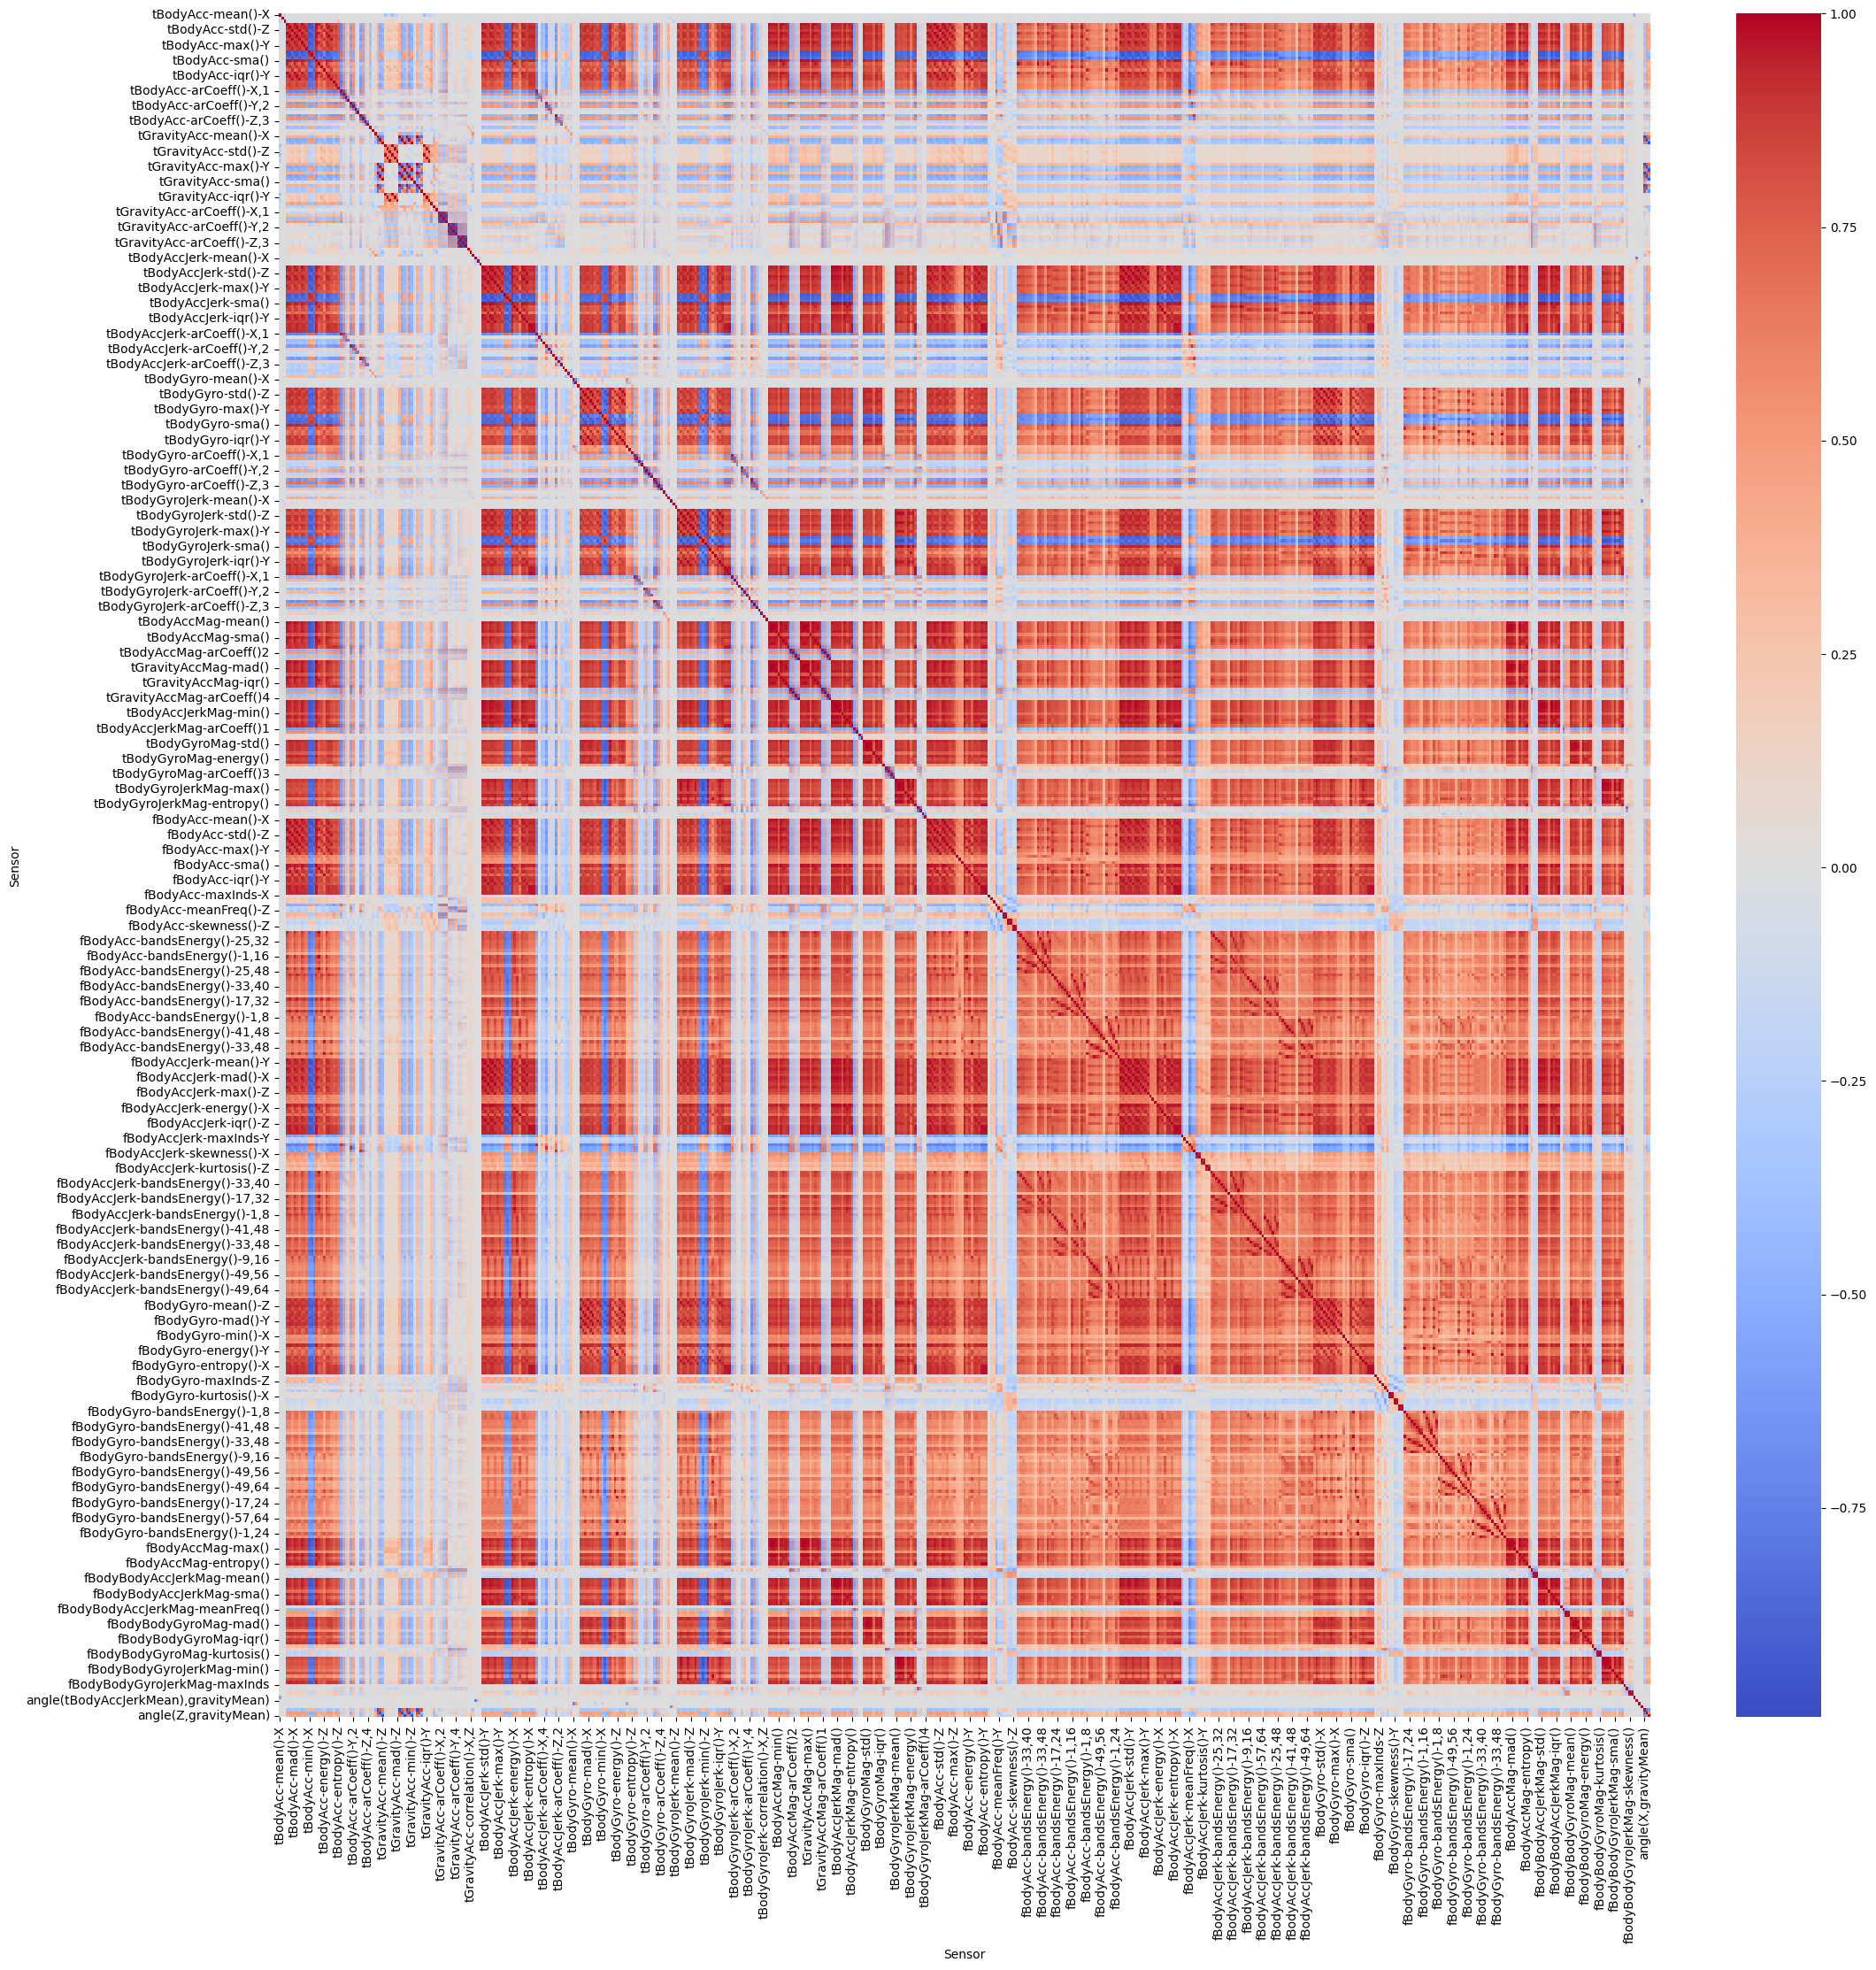

In [20]:
# plot on a heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlations, cmap='coolwarm')
plt.show()

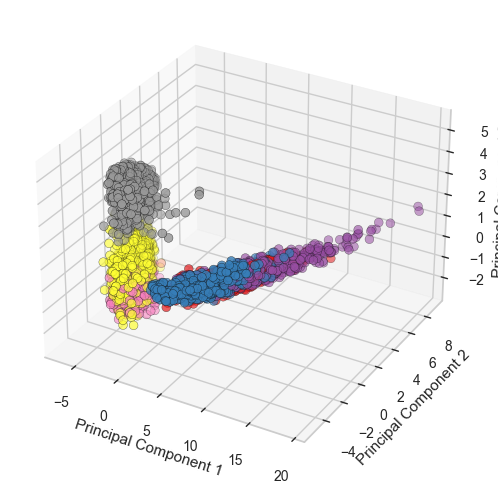

In [67]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction
pca = PCA(n_components=3)  # Reduce to 3 components for 3D visualization
X_pca = pca.fit_transform(X_train)  
# Plotting in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_train.values.ravel(), cmap='Set1', edgecolor='k', s=40)

# Set labels for each axis
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()


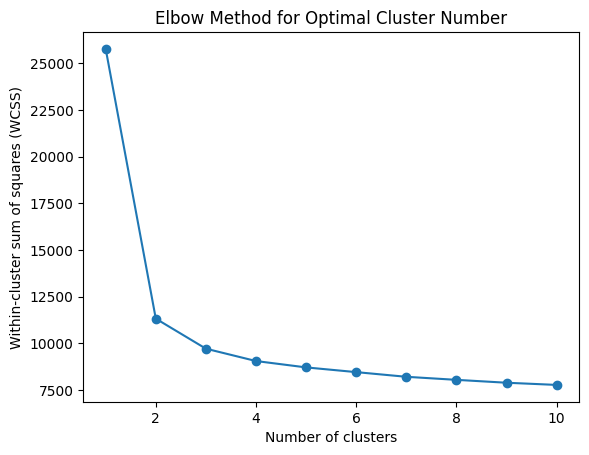

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to calculate the within-cluster sum of squares (WCSS) for different values of k
def calculate_wcss(data, max_k):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Define the maximum number of clusters to consider
max_clusters = 10

# Calculate WCSS for different values of k
wcss_values = calculate_wcss(X_train_cleaned, max_clusters)

# Plot the Elbow curve
plt.plot(range(1, max_clusters+1), wcss_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()


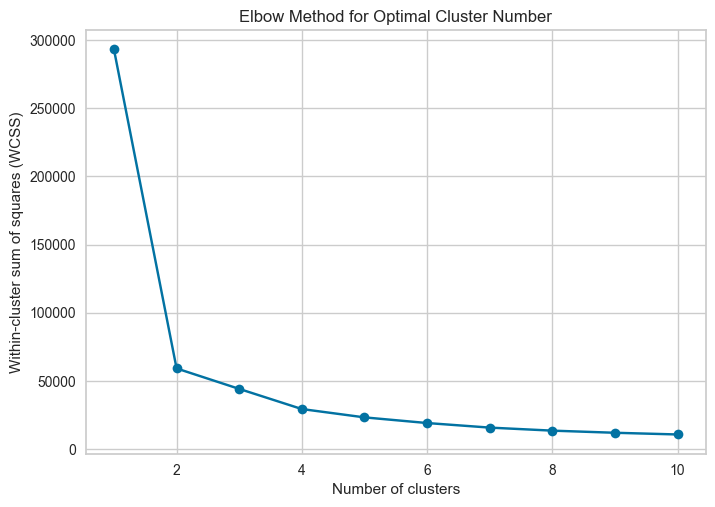

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to calculate the within-cluster sum of squares (WCSS) for different values of k
def calculate_wcss(data, max_k):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Define the maximum number of clusters to consider
max_clusters = 10

# Calculate WCSS for different values of k
wcss_values = calculate_wcss(X_pca, max_clusters)

# Plot the Elbow curve
plt.plot(range(1, max_clusters+1), wcss_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()


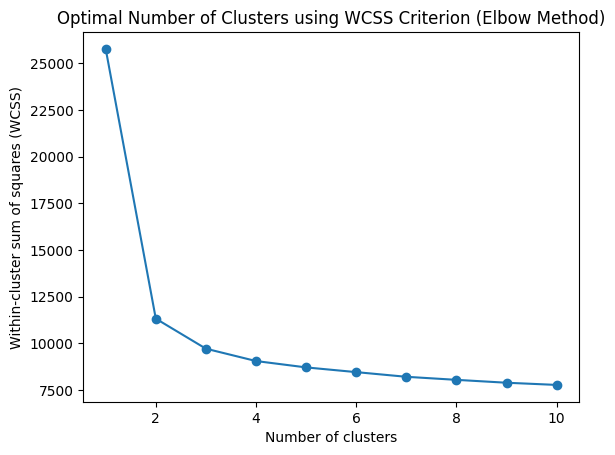

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to calculate the within-cluster sum of squares (WCSS) for different values of k
def calculate_wcss(data, max_k):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Define the maximum number of clusters to consider
max_clusters = 10

# Calculate WCSS for different values of k
wcss_values = calculate_wcss(X_train_cleaned, max_clusters)

# Plot the Elbow curve
plt.plot(range(1, max_clusters+1), wcss_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Optimal Number of Clusters using WCSS Criterion (Elbow Method)')
plt.show()




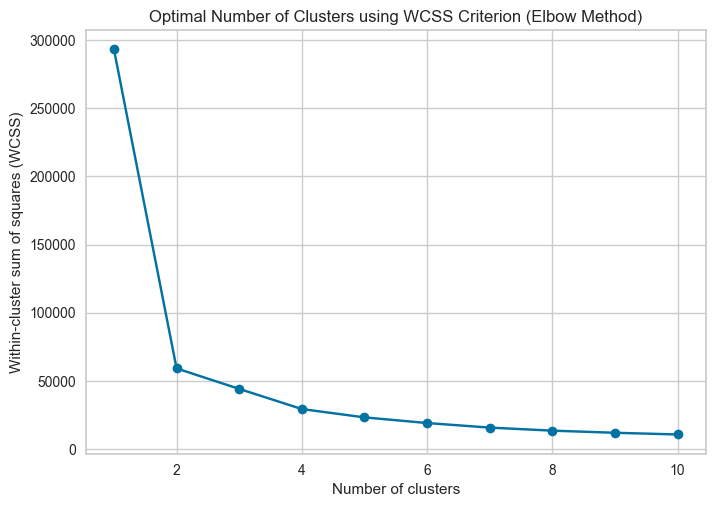

In [69]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to calculate the within-cluster sum of squares (WCSS) for different values of k
def calculate_wcss(data, max_k):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Define the maximum number of clusters to consider
max_clusters = 10

# Calculate WCSS for different values of k
wcss_values = calculate_wcss(X_pca, max_clusters)

# Plot the Elbow curve
plt.plot(range(1, max_clusters+1), wcss_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Optimal Number of Clusters using WCSS Criterion (Elbow Method)')
plt.show()




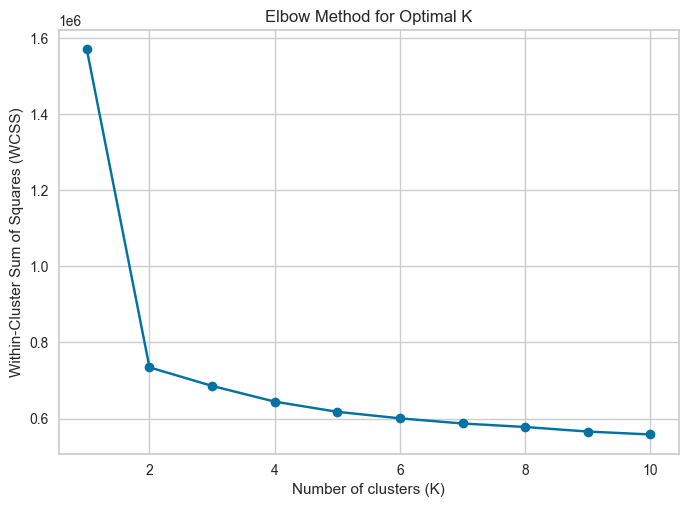

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to calculate WCSS for different values of K
def calculate_wcss(X, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    return wcss

# Apply StandardScaler on the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cleaned)

# Calculate WCSS for different values of K
wcss_values = calculate_wcss(X_train_scaled)

# Plot the Elbow curve
plt.plot(range(1, len(wcss_values)+1), wcss_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show() 


In [ ]:
# Function to find the optimal number of clusters using the Elbow method
def find_optimal_clusters(distortions):
    # Calculate the first derivative of the distortion values
    differences = np.diff(distortions)
    # Calculate the second derivative of the differences
    second_differences = np.diff(differences)

    # Find the index of the maximum second difference
    optimal_index = np.argmax(second_differences) + 2  # Adding 2 because of the two differences taken earlier

    return optimal_index

# Apply Elbow method to standardized data
distortions = []
for i in range(1, 11):  # Trying up to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train_scaled)
    distortions.append(kmeans.inertia_)

# Find the optimal number of clusters
optimal_clusters = find_optimal_clusters(distortions)

print("Optimal number of clusters:", optimal_clusters)


Optimal number of clusters: 2


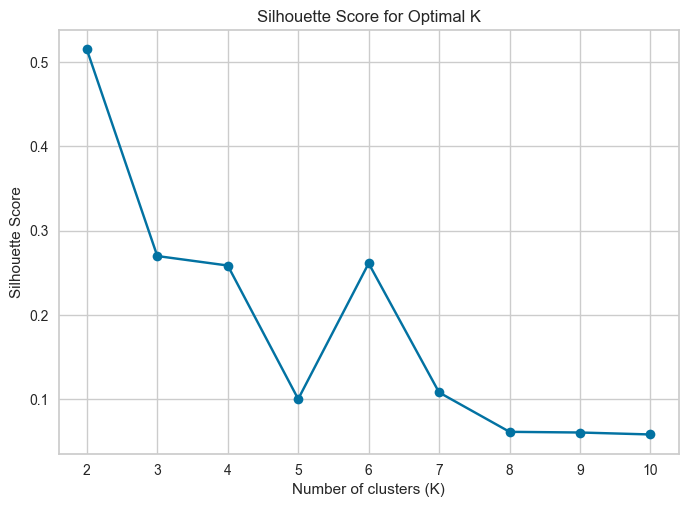

Optimal number of clusters (K) based on silhouette score: 2


In [ ]:
from sklearn.metrics import silhouette_score

# Function to calculate silhouette score for different values of K
def calculate_silhouette_scores(X, max_clusters=10):
    silhouette_scores = []
    for i in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        labels = kmeans.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, labels))
    return silhouette_scores

# Calculate silhouette scores for different values of K
silhouette_scores = calculate_silhouette_scores(X_train_scaled)

# Plot silhouette scores
plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

# Find the optimal number of clusters (K) with the highest silhouette score
optimal_k = np.argmax(silhouette_scores) + 2  # Add 2 to account for starting K=2
print("Optimal number of clusters (K) based on silhouette score:", optimal_k)


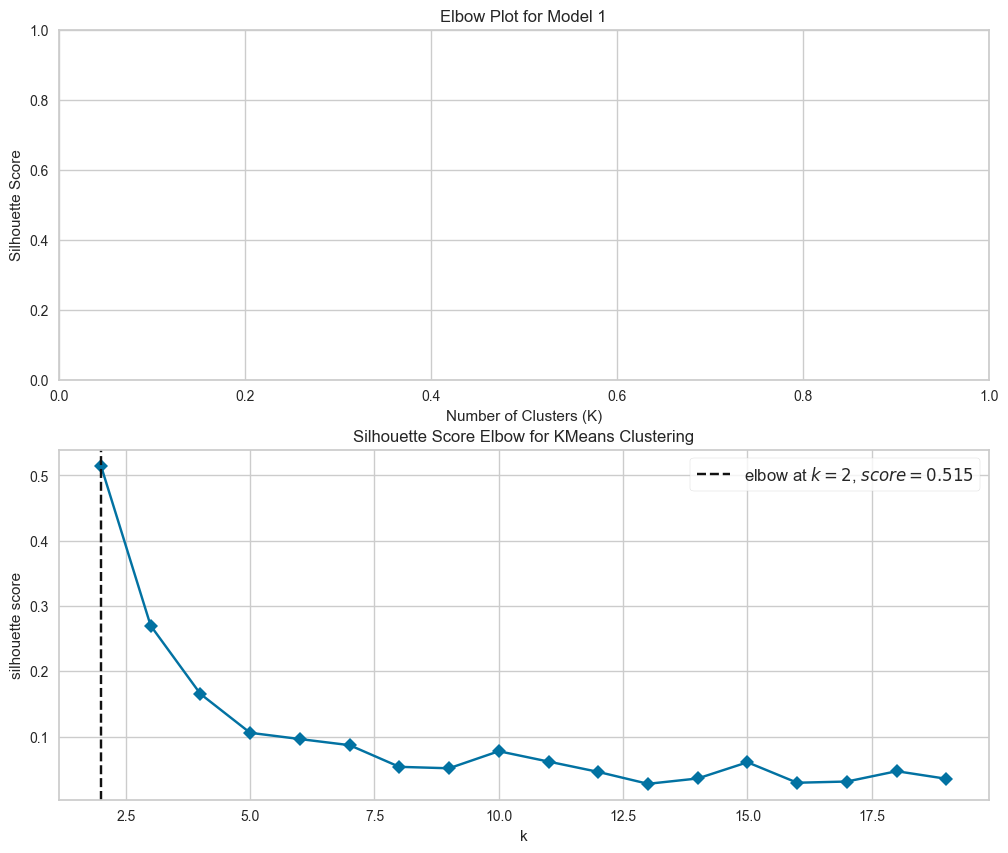

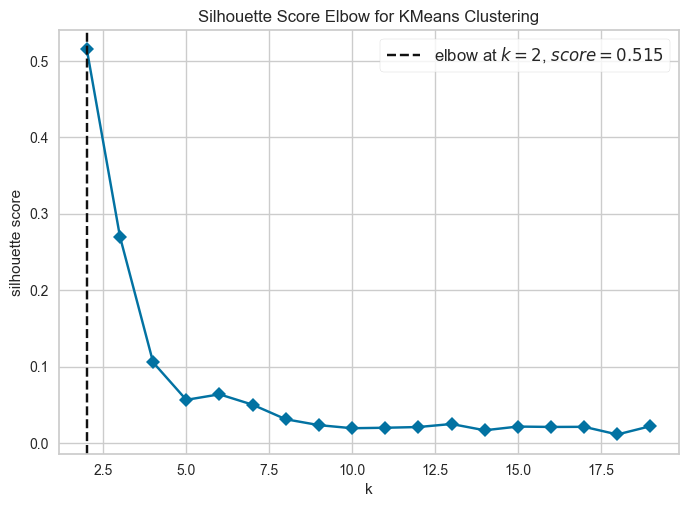

<Figure size 800x550 with 0 Axes>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Instantiate the scikit-learn K-Means model with different hyperparameters
model_1 = KMeans(random_state=10, max_iter=500, init='k-means++')
model_2 = KMeans(random_state=10, max_iter=1000, init='random')

# Instantiate the KElbowVisualizer with the number of clusters and the metric for both models
visualizer_1 = KElbowVisualizer(model_1, k=(2, 20), metric='silhouette', timings=False)
visualizer_2 = KElbowVisualizer(model_2, k=(2, 20), metric='silhouette', timings=False)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Fit the data and visualize for model 1
axes[0].set_title('Elbow Plot for Model 1')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Silhouette Score')
visualizer_1.fit(X_train_scaled)
visualizer_1.poof()

# Fit the data and visualize for model 2
axes[1].set_title('Elbow Plot for Model 2')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
visualizer_2.fit(X_train_scaled)
visualizer_2.poof()

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import silhouette_score

# Define a list of cluster numbers to try
clust_list = [2, 3, 4, 5, 6, 7, 8, 9]

# Compute silhouette score for each number of clusters
for n_clusters in clust_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X_train_scaled)
    sil_score = silhouette_score(X_train_scaled, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", sil_score)


For n_clusters = 2 The average silhouette_score is : 0.5150108591209619
For n_clusters = 3 The average silhouette_score is : 0.2607177928944387
For n_clusters = 4 The average silhouette_score is : 0.2656043445964281
For n_clusters = 5 The average silhouette_score is : 0.1605035003245063
For n_clusters = 6 The average silhouette_score is : 0.09839971671793017
For n_clusters = 7 The average silhouette_score is : 0.07884247927055708
For n_clusters = 8 The average silhouette_score is : 0.07723827904524498
For n_clusters = 9 The average silhouette_score is : 0.05960984702505373


From these scores, it's evident that the highest silhouette score is achieved when the number of clusters is 2 (0.5150108591209619). Therefore, for this dataset and clustering algorithm, the best number of clusters would be 2.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler on the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_no_outliers)

# Number of clusters to find
n_clusters = 2
print("We have found a good number of clusters =", n_clusters)

# Build K-Means clustering algorithm with the specified number of clusters
model_kmeans = KMeans(n_clusters=n_clusters, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(X_train_normalized)

# Print the shape of cluster labels
print("y_predict_kmeans shape:", y_predict_kmeans.shape)

# Print cluster labels
print("Cluster labels:")
print(y_predict_kmeans)

# Print cluster centers
print("Cluster centers:")
print(model_kmeans.cluster_centers_)


We have found a good number of clusters = 2
y_predict_kmeans shape: (501,)
Cluster labels:
[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0
 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 

In [ ]:
model_kmeans.inertia_

4477.606345661878

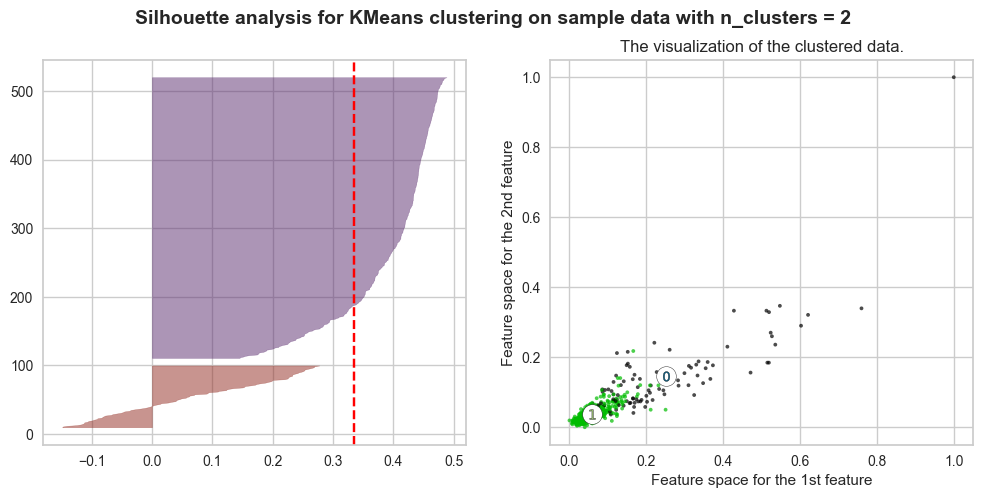

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create a SilhouetteVisualizer instance
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
fig.set_size_inches(12, 5)

# Plot silhouette analysis
sil_visualizer = SilhouetteVisualizer(model_kmeans, ax=ax1, colors=['#922B21', '#5B2C6F', '#1B4F72', '#32a84a'])
sil_visualizer.fit(X_train_normalized)

# Plot actual clusters formed
colors = cm.nipy_spectral(model_kmeans.labels_.astype(float) / n_clusters)  # n_clusters is the number of clusters
ax2.scatter(X_train_normalized[:, 6], X_train_normalized[:, 9], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Labeling the clusters
centers = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 6], centers[:, 9], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title(label="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

# Display the visualization
plt.show()


In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler to the dataset
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Build KMeans clustering model with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Print the cluster centers
print("Cluster centers:")
print(kmeans.cluster_centers_)

# Print the number of data points in each cluster
print("Number of data points in each cluster:")
print(pd.Series(cluster_labels).value_counts())


Cluster centers:
[[0.63793535 0.49231606 0.44624661 ... 0.3486659  0.62070143 0.41510812]
 [0.63639384 0.48972096 0.44442451 ... 0.1403046  0.83355885 0.5413978 ]]
Number of data points in each cluster:
0    4055
1    3297
Name: count, dtype: int64


In [27]:
kmeans.inertia_

45756.81092915856

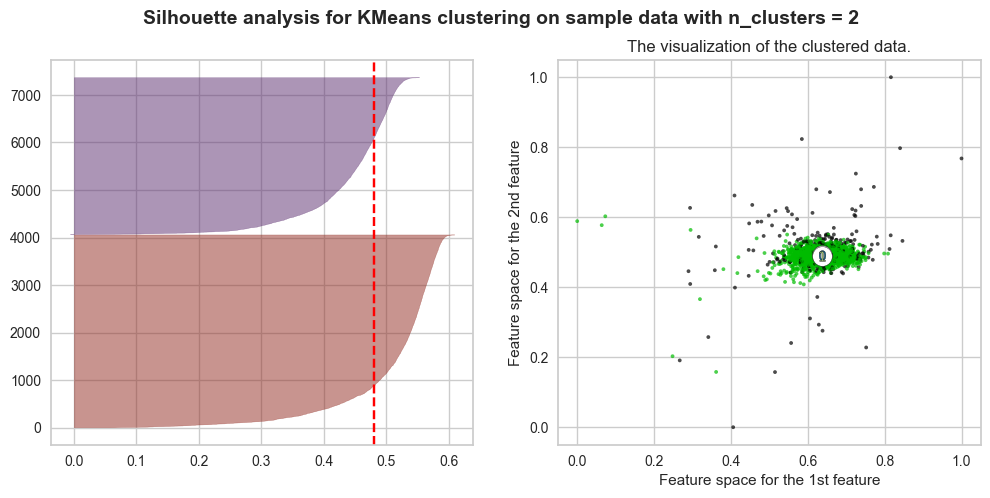

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

# Create the SilhouetteVisualizer
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
fig.set_size_inches(12, 5)

# Create and fit the SilhouetteVisualizer
sil_visualizer = SilhouetteVisualizer(kmeans, ax=ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer.fit(X_train_scaled)

# 2nd Plot showing the actual clusters formed
import matplotlib.cm as cm
colors = cm.nipy_spectral(cluster_labels.astype(float) / 2)  # 2 is the number of clusters
ax2.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title(label="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 2), fontsize=14, fontweight='bold')

plt.show()


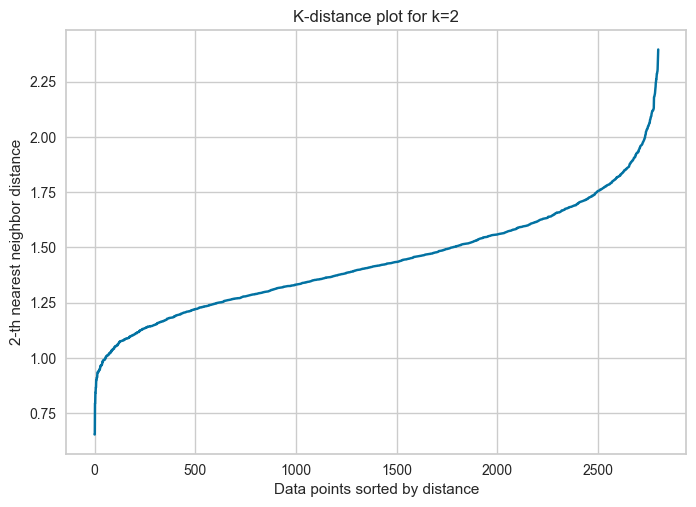

In [47]:
from sklearn.neighbors import NearestNeighbors

# Calculate the k-distance plot
k = 2  # Choose a value for k
nbrs = NearestNeighbors(n_neighbors=k).fit(X_train_cleaned)
distances, _ = nbrs.kneighbors(X_train_cleaned)
k_distances = distances[:, -1]  # Get the distance to the k-th nearest neighbor

# Plot the k-distance plot
plt.plot(np.sort(k_distances))
plt.xlabel('Data points sorted by distance')
plt.ylabel(f'{k}-th nearest neighbor distance')
plt.title(f'K-distance plot for k={k}')
plt.show()

# Determine the optimal eps value (e.g., by identifying the knee in the plot)


In [48]:
knee_idx = np.argmax(np.diff(k_distances, 2))
optimal_eps = k_distances[knee_idx]

print(f'Estimated optimal eps value: {optimal_eps}')

Estimated optimal eps value: 2.2956514422723706


In [51]:
from sklearn.metrics import silhouette_score

# Define a range of min_samples values to try
min_samples_range = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# Initialize variables to store silhouette scores and corresponding min_samples values
best_min_samples = None
best_silhouette_score = -1  # Initialize with a low value

# Iterate over min_samples values and calculate silhouette score for each
for min_samples_value in min_samples_range:
    dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples_value)
    cluster_labels = dbscan.fit_predict(X_train_cleaned)
    silhouette_avg = silhouette_score(X_train_cleaned, cluster_labels)
    
    print(f"Min_samples = {min_samples_value}, Silhouette Score = {silhouette_avg}")
    
    # Update best min_samples value if silhouette score is higher
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_min_samples = min_samples_value

print(f"\nOptimal min_samples value: {best_min_samples} with Silhouette Score: {best_silhouette_score}")


Min_samples = 5, Silhouette Score = 0.4432106694251238
Min_samples = 10, Silhouette Score = 0.45560324057024376
Min_samples = 15, Silhouette Score = 0.44648663170297187
Min_samples = 20, Silhouette Score = 0.44643402135254096
Min_samples = 25, Silhouette Score = 0.4425367325511383
Min_samples = 30, Silhouette Score = 0.44082833398996746
Min_samples = 35, Silhouette Score = 0.4358139999710136
Min_samples = 40, Silhouette Score = 0.4328117192761108
Min_samples = 45, Silhouette Score = 0.4349070022590745
Min_samples = 50, Silhouette Score = 0.4338866008393362
Min_samples = 55, Silhouette Score = 0.4307764797867705
Min_samples = 60, Silhouette Score = 0.42869165332672804
Min_samples = 65, Silhouette Score = 0.4281316746928674
Min_samples = 70, Silhouette Score = 0.4255898471475808
Min_samples = 75, Silhouette Score = 0.41841871098982797
Min_samples = 80, Silhouette Score = 0.42156666545247623
Min_samples = 85, Silhouette Score = 0.4148274966802458
Min_samples = 90, Silhouette Score = 0.413

In [55]:
from sklearn.cluster import DBSCAN

# Define the estimated optimal parameters
optimal_eps = 2.2956514422723706
optimal_min_samples = 10  # Assuming you have also found the optimal min_samples value

# Create DBSCAN clustering model with the estimated optimal parameters
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
cluster_labels = dbscan.fit_predict(X_train_cleaned)

# Get the number of clusters (excluding noise points, labeled as -1)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Number of clusters:", num_clusters)

# Get the number of noise points
num_noise_points = list(cluster_labels).count(-1)
print("Number of noise points:", num_noise_points)


Number of clusters: 2
Number of noise points: 13


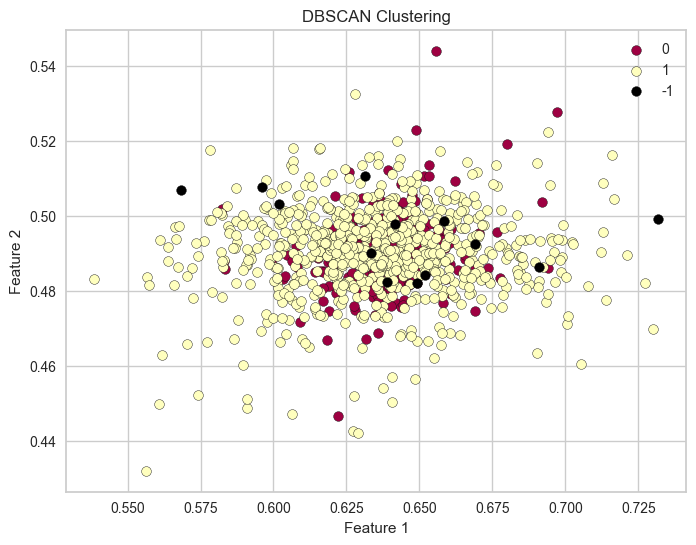

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Get unique cluster labels (excluding noise points)
unique_labels = set(cluster_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points are plotted as black color
        color = [0, 0, 0, 1]

    # Plot data points with the current cluster label
    cluster_points = X_train_cleaned[cluster_labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=label, edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()


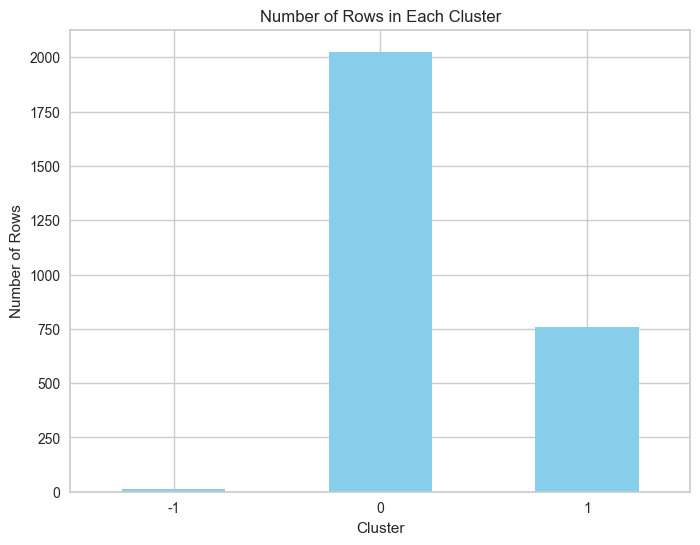

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert cluster labels to a DataFrame
df_clustered = pd.DataFrame({'Cluster': cluster_labels})

# Group by cluster and count the number of rows in each cluster
cluster_counts = df_clustered.groupby('Cluster').size()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Rows')
plt.title('Number of Rows in Each Cluster')
plt.xticks(rotation=0)
plt.show()


In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_minmax_scaled = scaler.fit_transform(X_train)

# Apply DBSCAN on the scaled data
dbscan = DBSCAN(eps=2.2956514422723706, min_samples=10)
cluster_labels = dbscan.fit_predict(X_train_minmax_scaled)

# Get the number of clusters (excluding noise points, labeled as -1)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Number of clusters:", num_clusters)

# Get the number of noise points
num_noise_points = list(cluster_labels).count(-1)
print("Number of noise points:", num_noise_points)


Number of clusters: 3
Number of noise points: 499


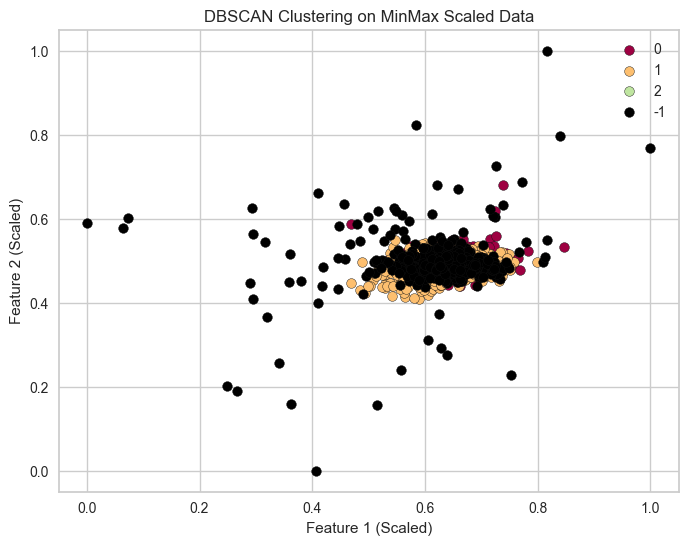

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Get unique cluster labels (excluding noise points)
unique_labels = set(cluster_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points are plotted as black color
        color = [0, 0, 0, 1]

    # Plot data points with the current cluster label
    cluster_points = X_train_minmax_scaled[cluster_labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=label, edgecolors='k')

plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('DBSCAN Clustering on MinMax Scaled Data')
plt.legend()
plt.show()


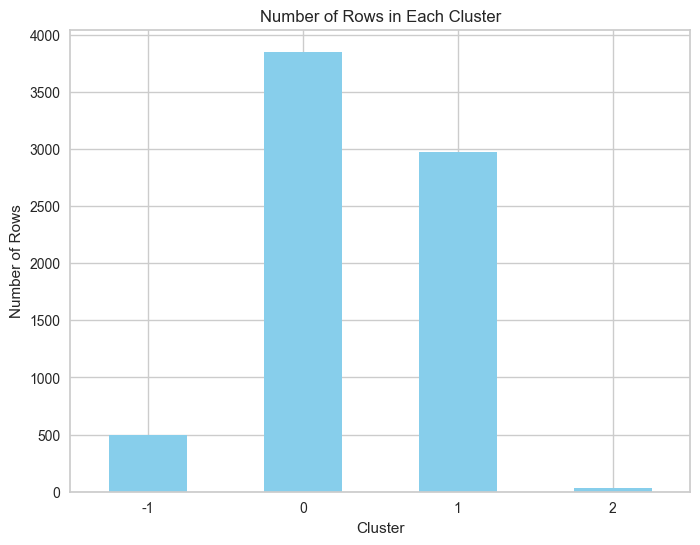

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert cluster labels to a DataFrame
df_clustered = pd.DataFrame({'Cluster': cluster_labels})

# Group by cluster and count the number of rows in each cluster
cluster_counts = df_clustered.groupby('Cluster').size()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Rows')
plt.title('Number of Rows in Each Cluster')
plt.xticks(rotation=0)
plt.show()
